In [36]:
import numpy as np
import sep
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from astropy.io import fits


In [37]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (10., 8.)

In [38]:
with fits.open('hlsp_hudf12_hst_wfc3ir_udfmain_f105w_v1.0_drz.fits') as hdul:
    data = hdul[0].data
data = data.byteswap().newbyteorder() 

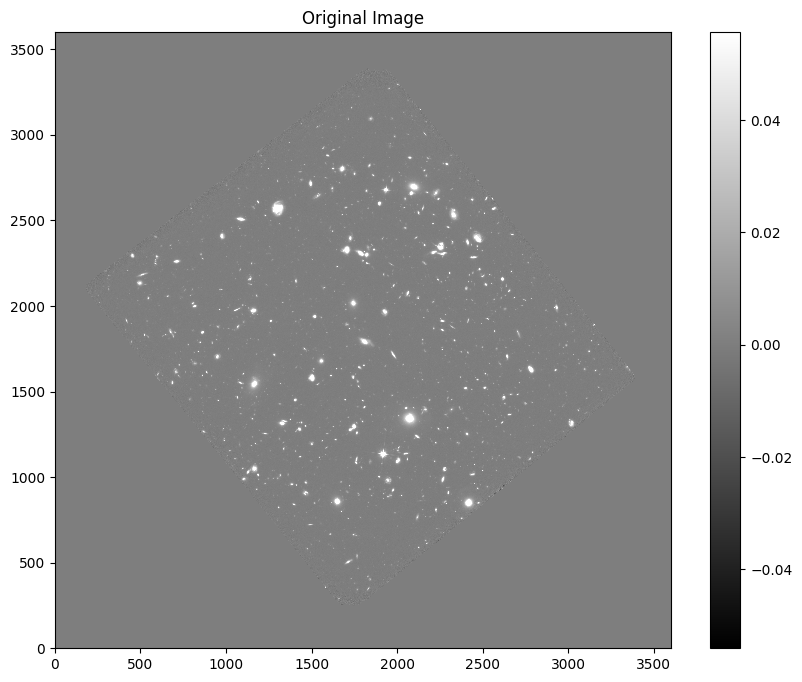

In [39]:
m, s = np.mean(data), np.std(data)
plt.figure()
plt.imshow(data, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')
plt.colorbar()
plt.title("Original Image")
plt.savefig('Original Image.png')
plt.show()


0.0
0.0005398219218477607


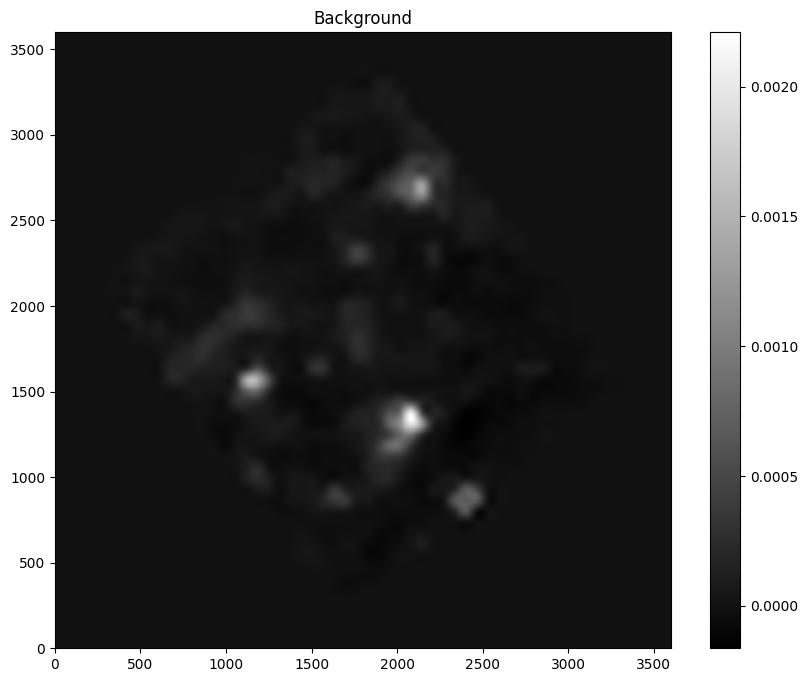

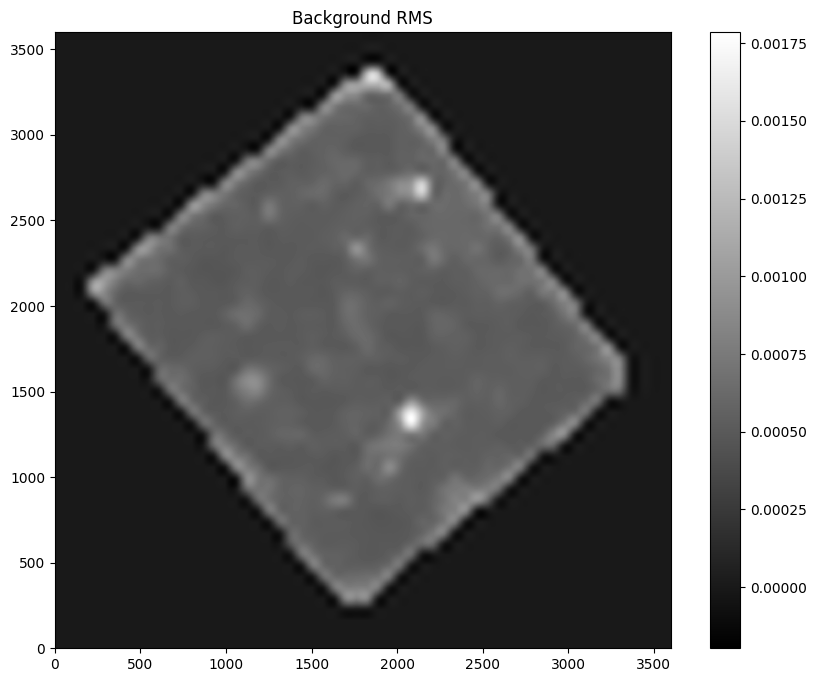

In [40]:
bkg = sep.Background(data)
print(bkg.globalback)  # Global background level
print(bkg.globalrms)  
bkg_image = bkg.back()
plt.figure()
plt.imshow(bkg_image, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar()
plt.title("Background")
plt.savefig('Background.png')
plt.show()
bkg_rms = bkg.rms()
plt.figure()
plt.imshow(bkg_rms, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar()
plt.title("Background RMS")
plt.savefig('Background RMS.png')
plt.show()

Number of objects detected: 8638


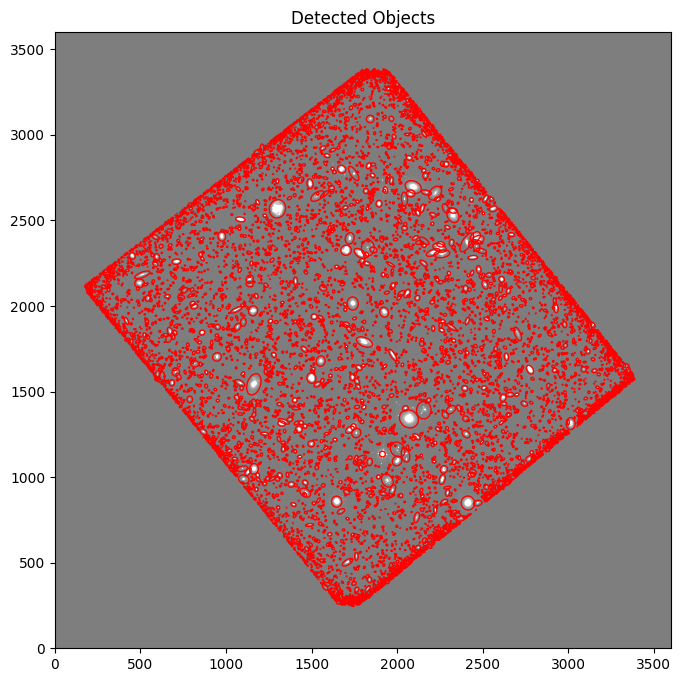

object 0: flux = 0.031 +/- 0.177
object 1: flux = 0.031 +/- 0.176
object 2: flux = -0.024 +/- 0.003
object 3: flux = 0.002 +/- 0.044
object 4: flux = 0.012 +/- 0.112
object 5: flux = -0.011 +/- 0.003
object 6: flux = 0.029 +/- 0.171
object 7: flux = -0.009 +/- 0.003
object 8: flux = 0.048 +/- 0.219
object 9: flux = 0.028 +/- 0.167


In [41]:
data_sub = data - bkg
objects = sep.extract(data_sub, 1.5, err=bkg.globalrms)
print(f"Number of objects detected: {len(objects)}")
fig, ax = plt.subplots()
m, s = np.mean(data_sub), np.std(data_sub)
im = ax.imshow(data_sub, interpolation='nearest', cmap='gray',
               vmin=m-s, vmax=m+s, origin='lower')


for obj in objects:
    e = Ellipse(xy=(obj['x'], obj['y']),
                width=6*obj['a'],
                height=6*obj['b'],
                angle=obj['theta'] * 180. / np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)

plt.title("Detected Objects")
plt.savefig('Detected Objects.png')
plt.show()


flux, fluxerr, flag = sep.sum_circle(data_sub, objects['x'], objects['y'], 3.0, err=bkg.globalrms, gain=1.0)


for i in range(10):
    print(f"object {i}: flux = {flux[i]:.3f} +/- {fluxerr[i]:.3f}")

Number of sources detected: 8638


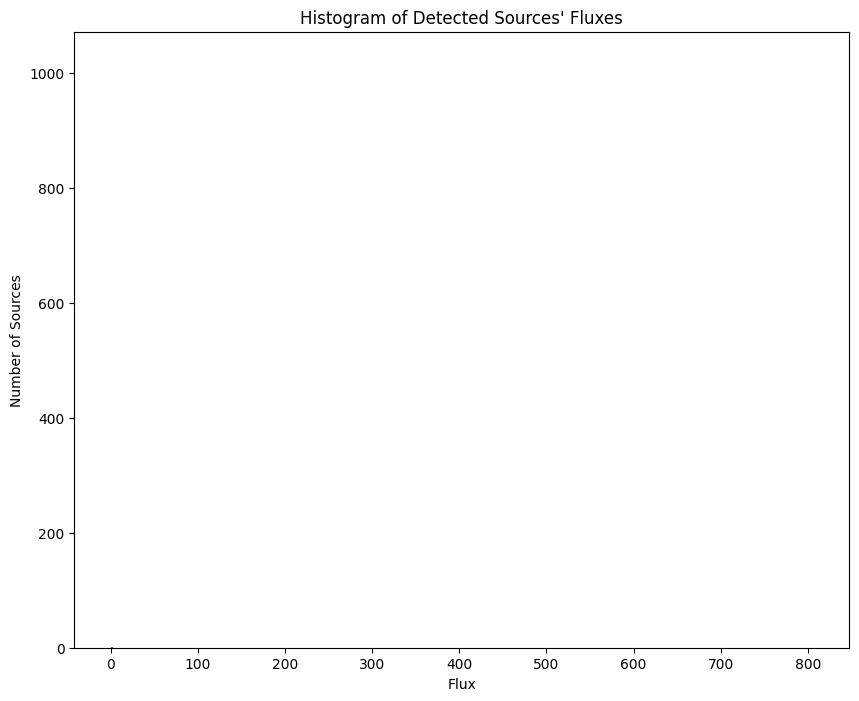

In [42]:
num_sources = len(objects)
print(f"Number of sources detected: {num_sources}")

plt.figure()
plt.hist(flux, bins='auto', color='black', alpha=0.7)
plt.title("Histogram of Detected Sources' Fluxes")
plt.xlabel("Flux")
plt.ylabel("Number of Sources")
plt.savefig('flux_histogram.png')
plt.show()

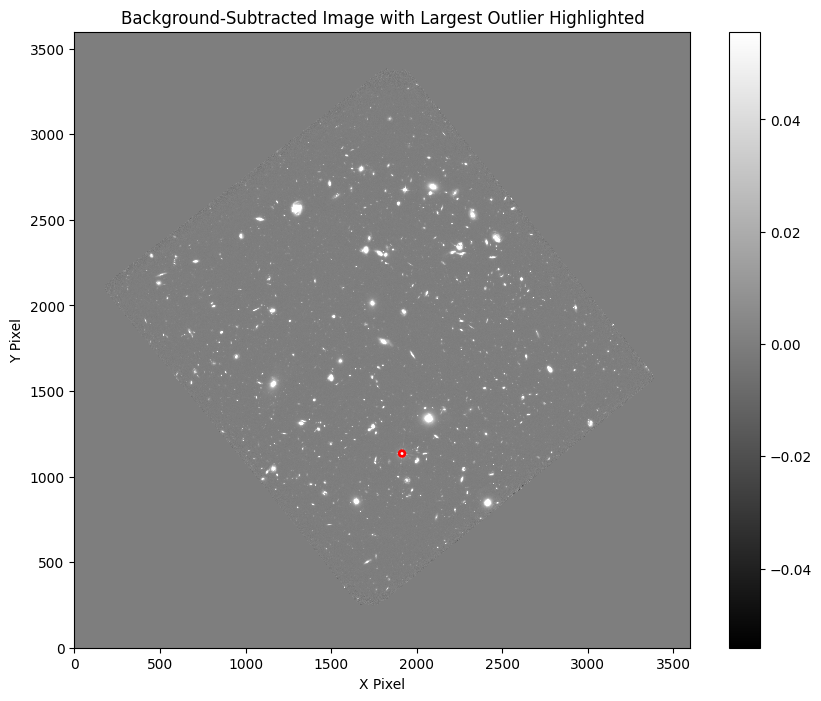

In [45]:
outlier_index = np.argmax(flux)

outlier_x = objects[outlier_index]['x']
outlier_y = objects[outlier_index]['y']

plt.figure(figsize=(10, 8))
m, s = np.mean(data_sub), np.std(data_sub)
plt.imshow(data_sub, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')

e = Ellipse(xy=(outlier_x, outlier_y),
            width=6*objects[outlier_index]['a'],
            height=6*objects[outlier_index]['b'],
            angle=objects[outlier_index]['theta'] * 180. / np.pi,
            edgecolor='red', facecolor='none', lw=2)
plt.gca().add_patch(e)

plt.colorbar()
plt.title('Background-Subtracted Image with Largest Outlier Highlighted')
plt.xlabel('X Pixel')
plt.ylabel('Y Pixel')
plt.savefig('highlighted_outlier.png') 
plt.show()